## 데이터 로드하기

In [29]:
import pandas as pd
import numpy as np

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터 정보 확인

In [30]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 컬럼제거

In [31]:
titanic_df.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'], inplace=True)

In [32]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


## 결측치 제거

In [33]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [34]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


## Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic_df['Sex'] = encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = encoder.fit_transform(titanic_df['Embarked'])

In [36]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


## Scaling
 * Standard scaling
 * MinMax scaling
 * Robust scaling

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler() 
scaler.fit(titanic_df)
titanic_scaled = scaler.transform(titanic_df)
titanic_df_scaled = pd.DataFrame(data=titanic_scaled, columns=titanic_df.columns)

mscaler = MinMaxScaler() 
mscaler.fit(titanic_df)
titanic_mscaled = mscaler.transform(titanic_df)
titanic_df_mscaled = pd.DataFrame(data=titanic_mscaled, columns=titanic_df.columns)

rbscaler = RobustScaler() 
rbscaler.fit(titanic_df)
titanic_rbscaled = scaler.transform(titanic_df)
titanic_df_rbscaled = pd.DataFrame(data=titanic_rbscaled, columns=titanic_df.columns)



<AxesSubplot:title={'center':'Robust Scaling'}, xlabel='Survived', ylabel='Density'>

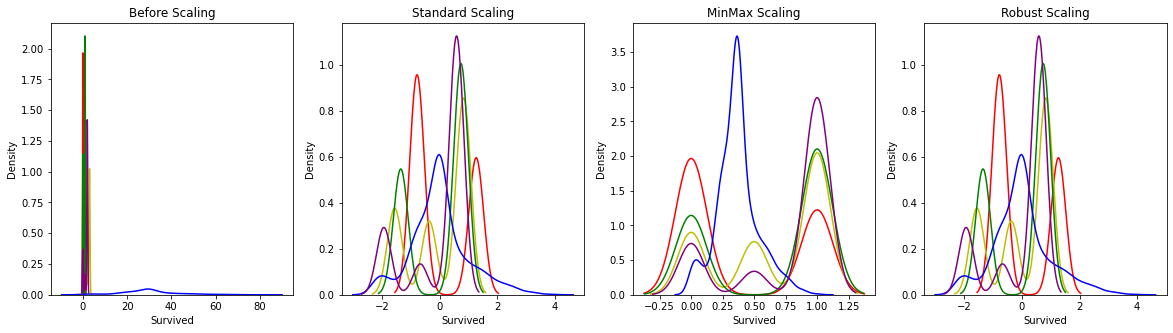

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3,ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(titanic_df['Survived'], ax = ax1, color = 'r')
sns.kdeplot(titanic_df['Pclass'], ax = ax1, color = 'y')
sns.kdeplot(titanic_df['Sex'], ax = ax1, color = 'g')
sns.kdeplot(titanic_df['Age'], ax = ax1, color = 'b')
sns.kdeplot(titanic_df['Embarked'], ax = ax1, color = 'purple')

ax2.set_title('Standard Scaling')
sns.kdeplot(titanic_df_scaled['Survived'], ax = ax2, color = 'r')
sns.kdeplot(titanic_df_scaled['Pclass'], ax = ax2, color = 'y')
sns.kdeplot(titanic_df_scaled['Sex'], ax = ax2, color = 'g')
sns.kdeplot(titanic_df_scaled['Age'], ax = ax2, color = 'b')
sns.kdeplot(titanic_df_scaled['Embarked'], ax = ax2, color = 'purple')

ax3.set_title('MinMax Scaling')
sns.kdeplot(titanic_df_mscaled['Survived'], ax = ax3, color = 'r')
sns.kdeplot(titanic_df_mscaled['Pclass'], ax = ax3, color = 'y')
sns.kdeplot(titanic_df_mscaled['Sex'], ax = ax3, color = 'g')
sns.kdeplot(titanic_df_mscaled['Age'], ax = ax3, color = 'b')
sns.kdeplot(titanic_df_mscaled['Embarked'], ax = ax3, color = 'purple')

ax4.set_title('Robust Scaling')
sns.kdeplot(titanic_df_rbscaled['Survived'], ax = ax4, color = 'r')
sns.kdeplot(titanic_df_rbscaled['Pclass'], ax = ax4, color = 'y')
sns.kdeplot(titanic_df_rbscaled['Sex'], ax = ax4, color = 'g')
sns.kdeplot(titanic_df_rbscaled['Age'], ax = ax4, color = 'b')
sns.kdeplot(titanic_df_rbscaled['Embarked'], ax = ax4, color = 'purple')